<a href="https://colab.research.google.com/github/PaletteofDesign/kmeans/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [14]:
f = '/content/cust_seg.csv'
df = pd.read_csv(f)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [15]:
df.rename(columns={'Customer Id': 'Customer_ID', 'Years Employed': 'Years_Employed', 
                   'Card Debt': 'Card_Debt', 'Other Debt': 'Other_Debt', 
                   'DebtIncomeRatio': 'Debt_Income_Ratio'},inplace=True)
df.head()

,Unnamed: 0,Customer_ID,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,Debt_Income_Ratio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [16]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,Customer_ID,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,Debt_Income_Ratio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [25]:
df.set_index('Customer_ID',inplace=True)

In [26]:
df.describe()

,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,Debt_Income_Ratio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [27]:
df.nunique()

Age                   37
Edu                    5
Years_Employed        33
Income               129
Card_Debt            727
Other_Debt           788
Defaulted              2
Debt_Income_Ratio    245
dtype: int64

In [28]:
df.isnull().sum()

Age                    0
Edu                    0
Years_Employed         0
Income                 0
Card_Debt              0
Other_Debt             0
Defaulted            150
Debt_Income_Ratio      0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                850 non-null    int64  
 1   Edu                850 non-null    int64  
 2   Years_Employed     850 non-null    int64  
 3   Income             850 non-null    int64  
 4   Card_Debt          850 non-null    float64
 5   Other_Debt         850 non-null    float64
 6   Defaulted          700 non-null    float64
 7   Debt_Income_Ratio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [30]:
zero = df['Defaulted']==0
df[zero].head()

,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,Debt_Income_Ratio
Customer_ID,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
7,38,2,4,56,0.442,0.454,0.0,1.6


In [38]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

We will use customer age, education years of employment, income, debt, whether they defaulted, and debt: income ratio to group them into segments.

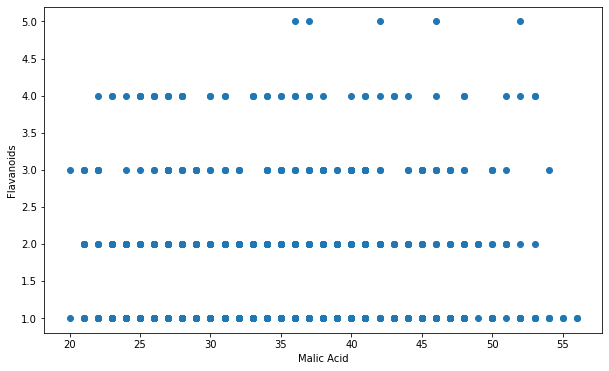

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['Edu'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids');

In [40]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(scaled_df)

ValueError: ignored